### <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Monthly Income Prediction</div></b>
This project employs regression modeling to forecast the monthly income of employees based on specified variables.

##### Import major Libraries

In [2]:
# Import major Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
# Import the dataset
data = pd.read_csv("train_data.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##### Data Cleaning & Preprosessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [5]:
# Checking for missing values

data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in our data

In [6]:
# Checking for duplicates

data.duplicated().any().sum()

0

In [7]:
# Check the number unique values in each features
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    731
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1058
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                991
MonthlyRate                 1038
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [8]:
data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
data.shape

(1058, 35)

In [10]:
# Descriptive statistic of categorical columns
data.describe(include=["object", "bool"]).T

,count,unique,top,freq
BusinessTravel,1058,3,Travel_Rarely,746
Department,1058,3,Research & Development,701
EducationField,1058,6,Life Sciences,436
Gender,1058,2,Male,620
JobRole,1058,9,Sales Executive,232
MaritalStatus,1058,3,Married,464
Over18,1058,1,Y,1058
OverTime,1058,2,No,751


In [11]:
# Descriptive statistic of numerical columns
data.describe(include=["int64", "float64"]).T

,count,mean,std,min,25%,50%,75%,max
Age,1058.0,37.055766,9.410421,18.0,30.00,36.0,43.00,60.0
Attrition,1058.0,0.169187,0.375094,0.0,0.00,0.0,0.00,1.0
DailyRate,1058.0,809.542533,408.478049,102.0,465.25,817.5,1168.50,1499.0
DistanceFromHome,1058.0,8.978261,8.040608,1.0,2.00,7.0,13.00,29.0
Education,1058.0,2.879017,1.031442,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1058.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1058.0,731.753308,431.418209,1.0,364.50,723.5,1101.75,1487.0
EnvironmentSatisfaction,1058.0,2.712665,1.092959,1.0,2.00,3.0,4.00,4.0
HourlyRate,1058.0,65.643667,20.324861,30.0,48.00,65.0,83.00,100.0
JobInvolvement,1058.0,2.737240,0.704730,1.0,2.00,3.0,3.00,4.0


#### Data Preprocessing

As part of our preprocessing steps, we will drop some redundant columns

In [12]:
# Drop off some redundant features

data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','MonthlyRate', 'Attrition'], axis=1, inplace=True)

#### Exploratory Data Analysis

- Exploratory Data Analysis (EDA) is a crucial step in any data analysis project. It involves summarizing the main characteristics of the data and visualizing them to gain insights.

We will categorize the Age into age groups to help in our EDA

In [13]:
# Group Customer age

def AgeGroup(x):
    if x <= 25:
        return "Youth(<=25 )"
    elif x <= 40:
        return "Young Adult(26-40)"
    elif x<= 50:
        return "Adult(41-50)"
    else:
        return "Elder(>=51)"
    
# Apply function to the data create a new column(Agegroup)
data["AgeGroup"] = data["Age"].apply(AgeGroup)

data.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Adult(41-50)
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,Adult(41-50)
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Young Adult(26-40)


- Univariate analysis of the target variable

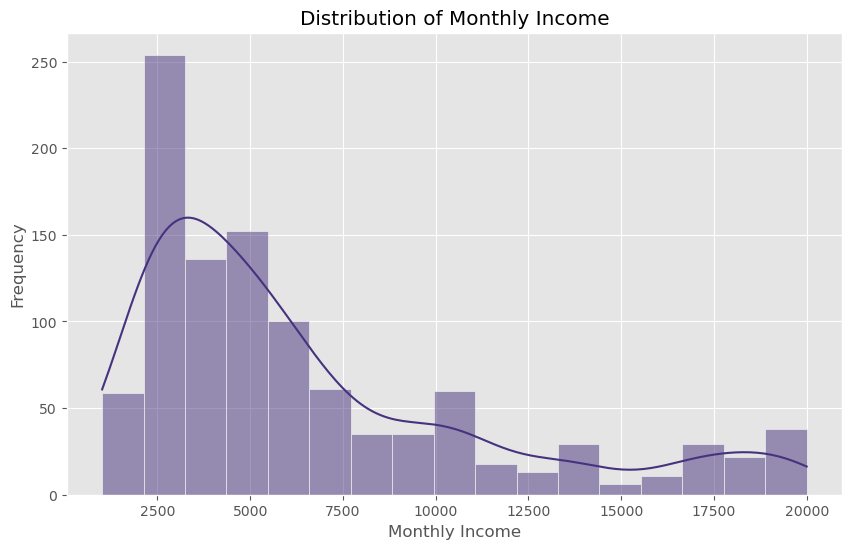

count     1058.000000
mean      6625.945180
std       4837.695042
min       1009.000000
25%       2900.250000
50%       4903.500000
75%       8736.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [44]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyIncome'], kde=True,  palette='Set2')
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for MonthlyIncome
data['MonthlyIncome'].describe()

The histogram shows the distribution of the MonthlyIncome variable for the employees in the dataset. The distribution is skewed to the right, indicating that most employees have a lower monthly income, with the majority earning between 2,500 and 5,000. There is a gradual decline in frequency as income increases, with very few employees earning above 15,000.

##### Key observations:

- Central Tendency: The mean monthly income is approximately 6,625, while the median (50th percentile) is 4,935.5, indicating that the data is right-skewed as the mean is higher than the median.

- Income Range: The monthly income ranges from a minimum of 1,009 to a maximum of 19,999, with the majority of employees earning below 10,000.

- Income Distribution: A significant portion of employees earns between 2,500 and 5,000, with fewer employees earning higher incomes.

- Potential Outliers: The right tail of the distribution (income above 15,000) suggests that there are a few high-income earners, which might be considered outliers or indicative of senior roles or specialized positions within the company.

This analysis suggests a workforce with a predominantly lower to mid-range income, with a small proportion of high earners potentially reflecting differences in job roles, experience, or education levels.

- Analyzing Categorical Features

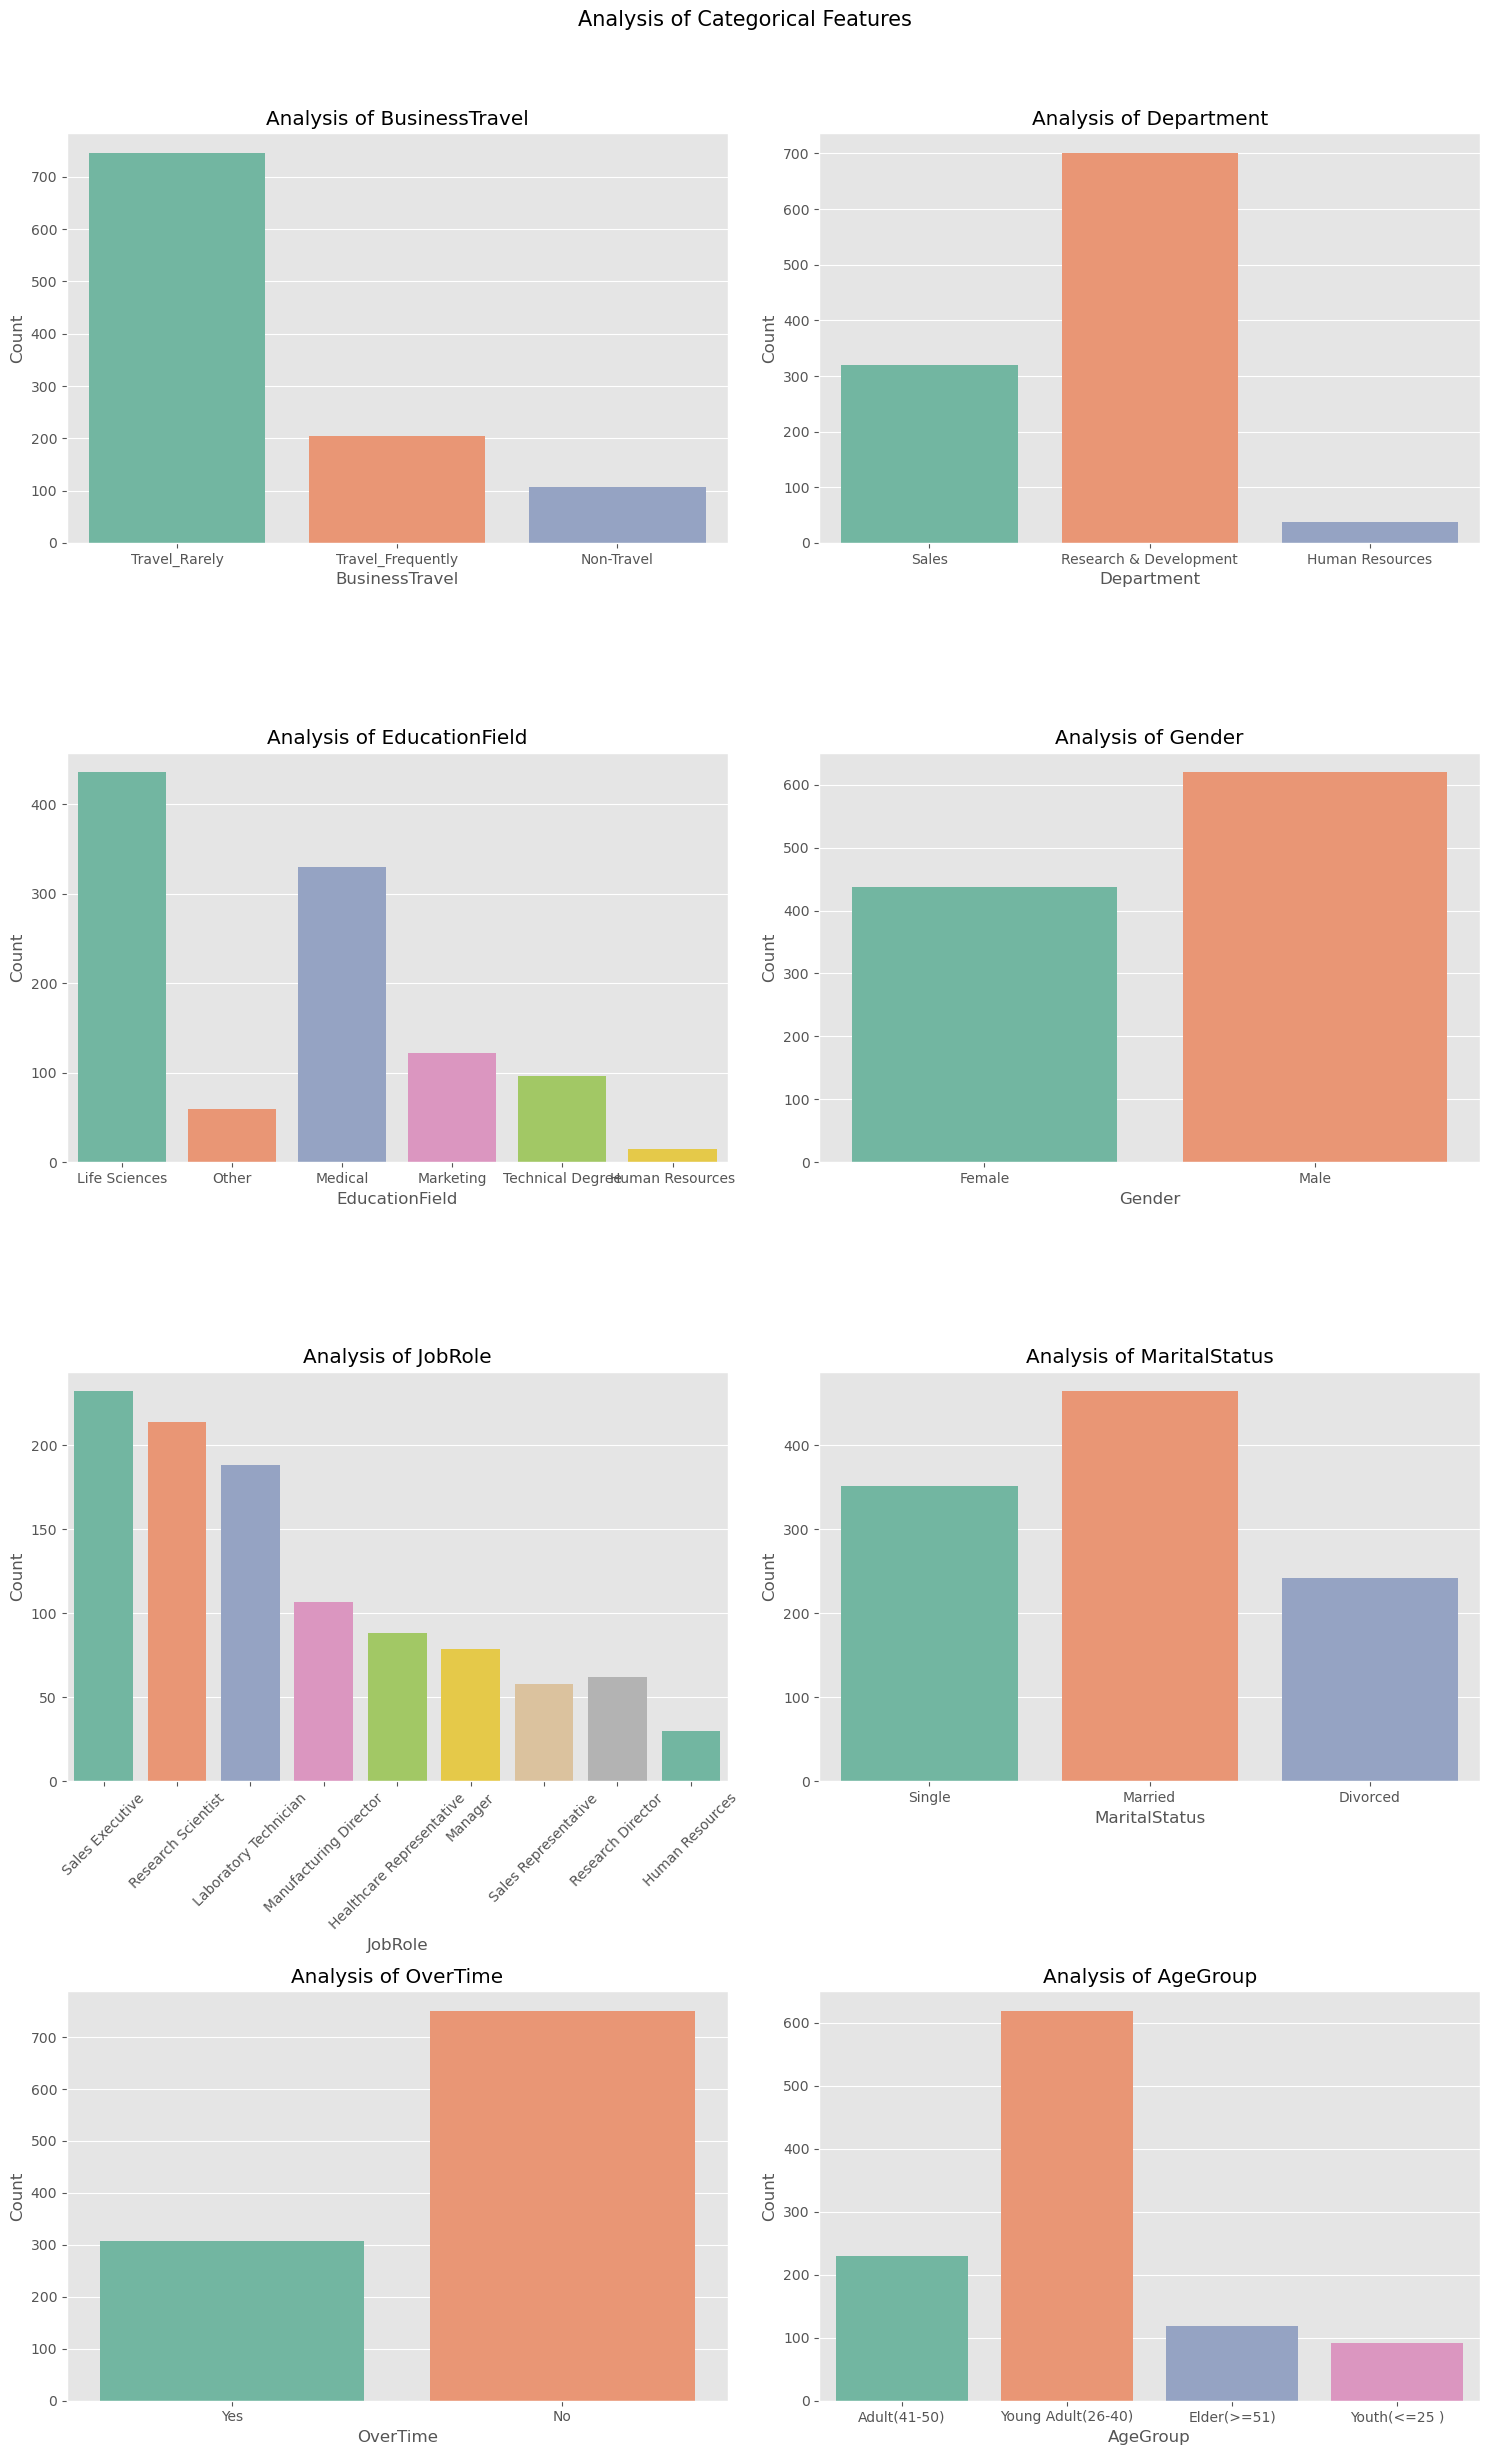

In [38]:
# Select categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Create a figure with subplots (4 rows x 2 columns to accommodate 8 features)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))
axes = axes.flatten()
fig.suptitle('Analysis of Categorical Features', fontsize=15)

# Plot bar plots for each categorical feature with Viridis color palette
for i, feature in enumerate(categorical_features):
    n_categories = data[feature].nunique()  # Number of unique categories in the feature
    palette = sns.color_palette('viridis', n_categories)  # Create a Viridis palette
    
    sns.countplot(x=feature, data=data, ax=axes[i],  palette='Set2')
    axes[i].set_title(f'Analysis of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    
    # Rotate the x-axis labels for better readability, especially for 'JobRole'
    if feature == 'JobRole':
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].tick_params(axis='x', rotation=0)

# Adjust layout to prevent the title from overlapping with the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


#### Bivariate Analysis
- Analyze the relationship between each feature and the target variable 

- Correlation analysis:
  - Identify multicollinearity and relationships between features and target

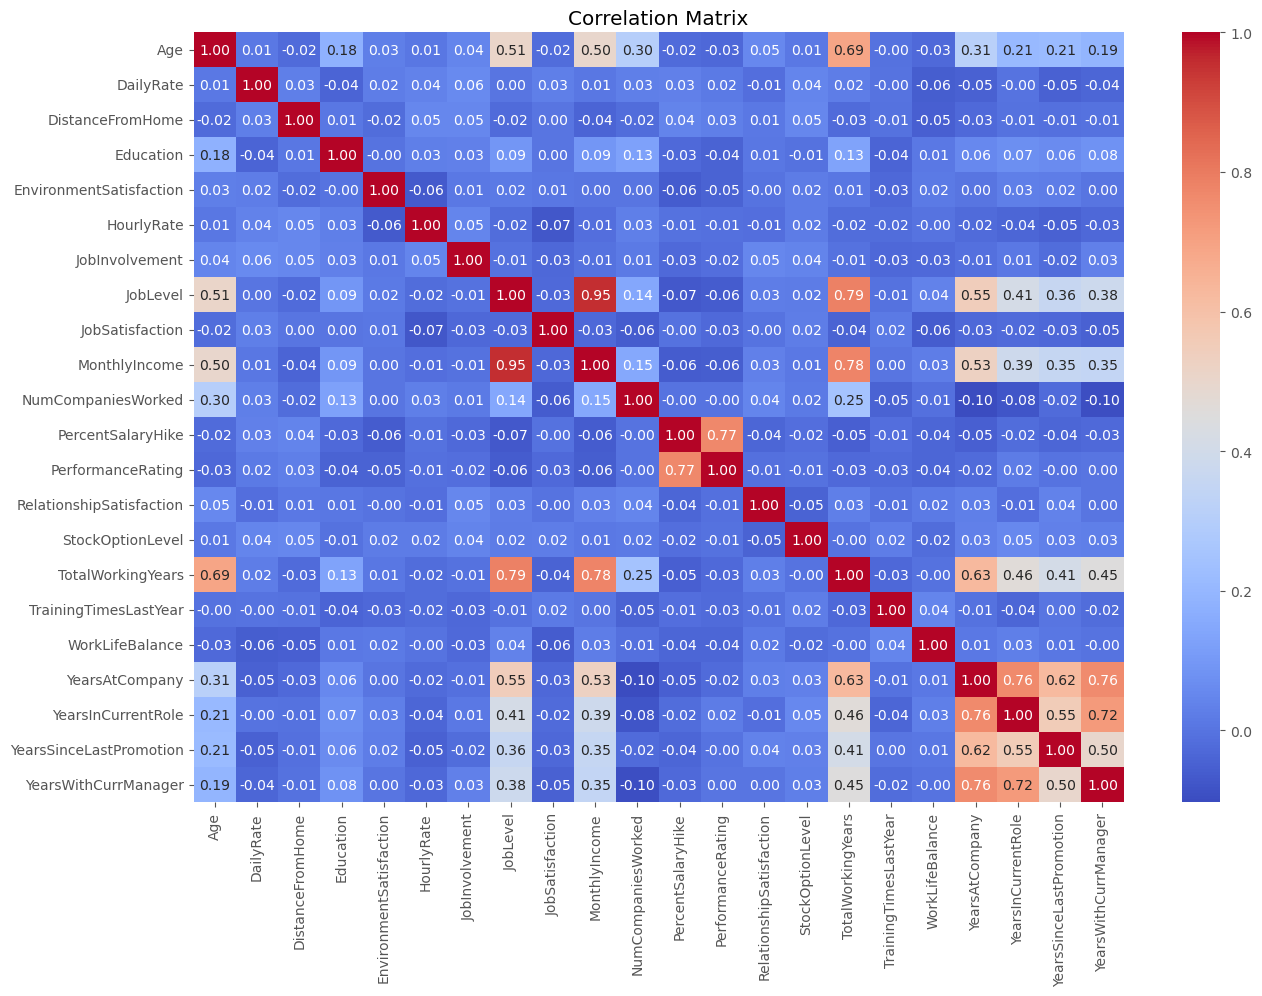

In [18]:
# Selecting only the numerical features from the dataset
numerical_features = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for numerical features
plt.figure(figsize=(15, 10))
correlation_matrix = numerical_features.corr()

# Plotting the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


The correlation matrix provides insights into the relationship between the target variable. **MonthlyIncome**  with other variables. The analysis focuses on understanding which factors are most strongly correlated with the target.


1. **Strong Positive Correlations**:
   - **`JobLevel` (0.95)**: There is a very strong positive correlation between `JobLevel` and `MonthlyIncome`. As the job level increases, the monthly income also increases significantly.
   - **`TotalWorkingYears` (0.78)**: This variable shows a strong positive correlation with `MonthlyIncome`. Employees with more years of work experience tend to have higher monthly incomes.
   - **`YearsAtCompany` (0.53)**: This variable also has a moderate positive correlation with `MonthlyIncome`, indicating that employees who have been with the company for a longer period tend to earn more.
   - **`YearsInCurrentRole` (0.39)**: There is a moderate positive correlation between `YearsInCurrentRole` and `MonthlyIncome`. Employees who have spent more time in their current role tend to have higher incomes.
   - **`YearsWithCurrManager` (0.35)**: There is a moderate positive correlation with `MonthlyIncome`, indicating that employees who have worked with their current manager for longer periods tend to have higher incomes.

2. **Moderate Positive Correlation**:
   - **`Age` (0.50)**: There is a moderate positive correlation between `Age` and `MonthlyIncome`. Older employees generally earn more, likely due to accumulated experience.
   
3. **Weak or Negligible Correlations**:
   - Variables like **`PerformanceRating` (0.03)**, **`PercentSalaryHike` (-0.03)**, **`RelationshipSatisfacti n` (0.01)**, **`EnvironmentSatisfaction` (0.03)**, and **`WorkLifeBalance` (-0.06)** show very weak or negligible correlations with `MonthlyIncome`. This suggests that these factors have minimal direct impact on the monthly income of employees.
   - **`Education` (0.10)**: The correlation between `Education` and `MonthlyIncome` is relatively weak. While higher education levels might lead to higher income, the effect is not as pronounced as with job level or total working years.

### Overall Insights:
- **Experience and Job Level are Key Determinants**: `JobLevel`, `TotalWorkingYears`, and related experience variables like `YearsAtCompany`, `YearsInCurrentRole`, and `YearsWithCurrManager` are the strongest predictors of `MonthlyIncome`. This suggests that experience and job progression within the company are crucial in determining employee compensation.
- **Age as an Indicator of Experience**: The moderate correlation with `Age` further supports the idea that experience (often associated with age) plays a significant role in determining income.
- **Education's Limited Direct Impact**: While education might be a prerequisite for certain job levels, its direct correlation with `MonthlyIncome` is weaker compared to job experience and position.

This analysis indicates that within the organization, factors related to job progression and experience have a more substantial influence on monthly income than other personal or job satisfaction-related factors.

- Relationship Between MonthlyIncome and Other Features

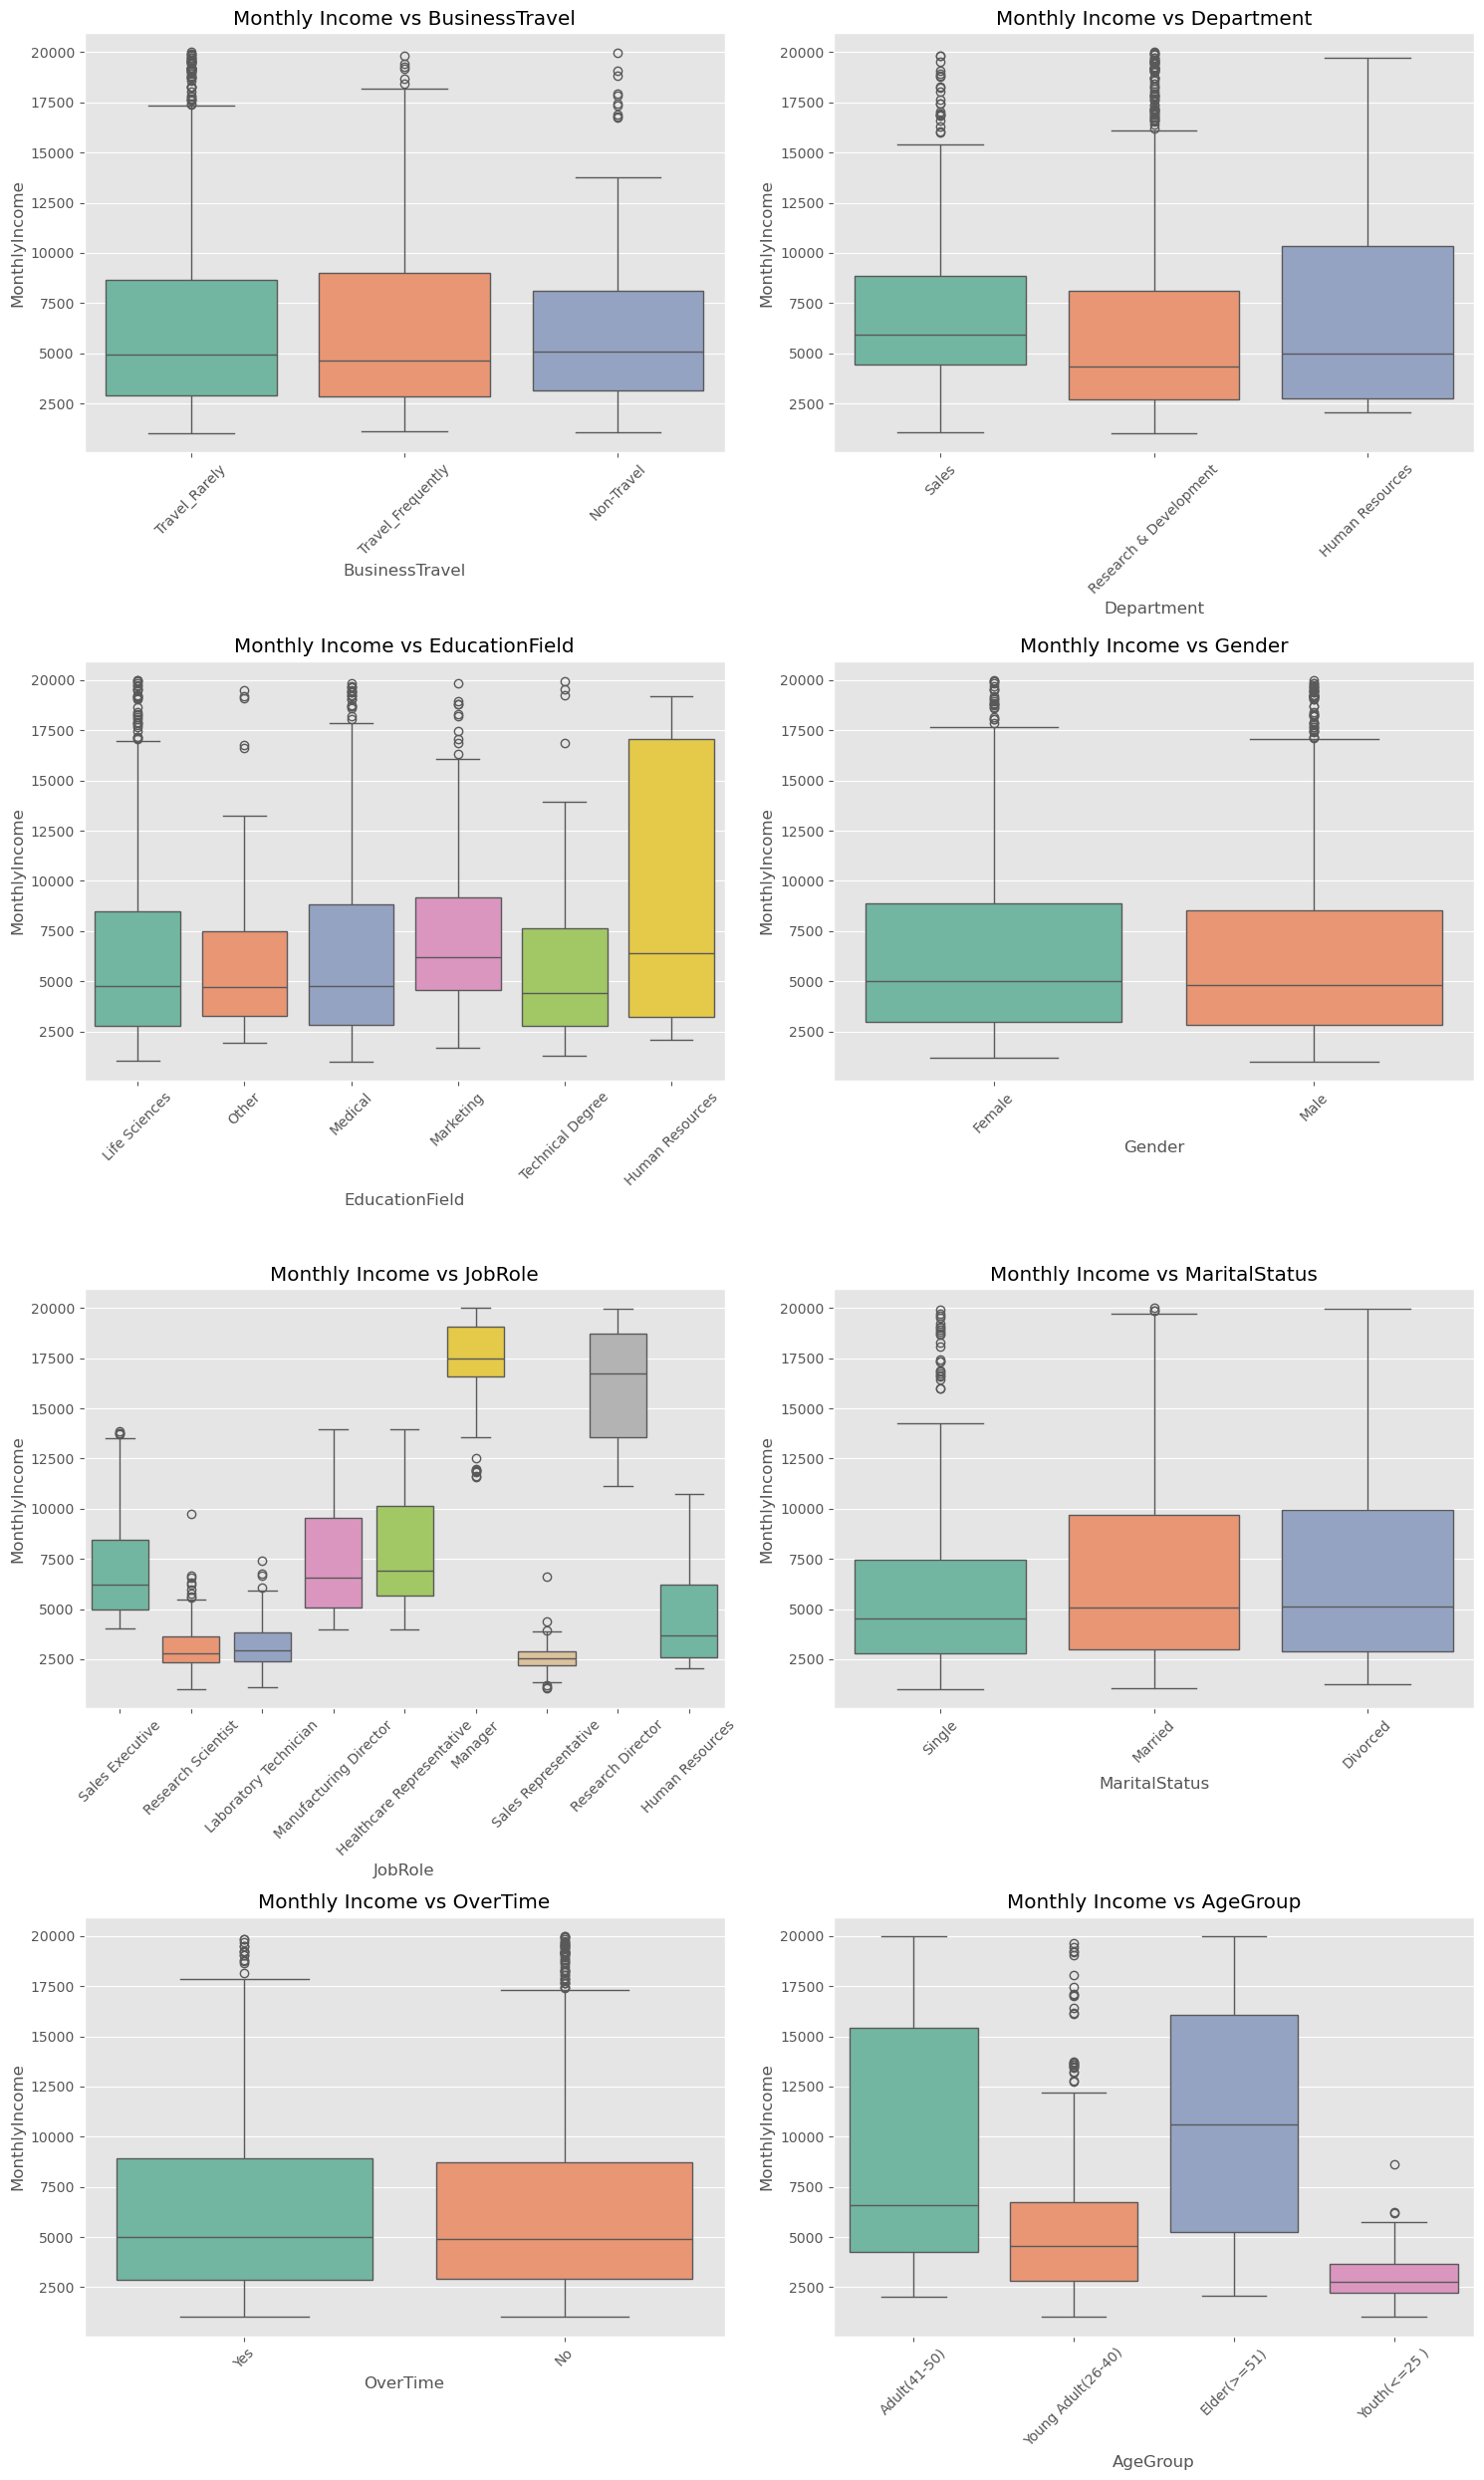

In [36]:
# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Create a figure with subplots (4 rows x 2 columns to accommodate 8 features)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))

# Flatten the axes array to easily index it in a loop
axes = axes.flatten()

# Loop through each categorical column and create a boxplot
for i, col in enumerate(categorical_cols):
    sns.boxplot(ax=axes[i], x=col, y='MonthlyIncome', data=data, palette='Set2')
    axes[i].set_title(f'Monthly Income vs {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


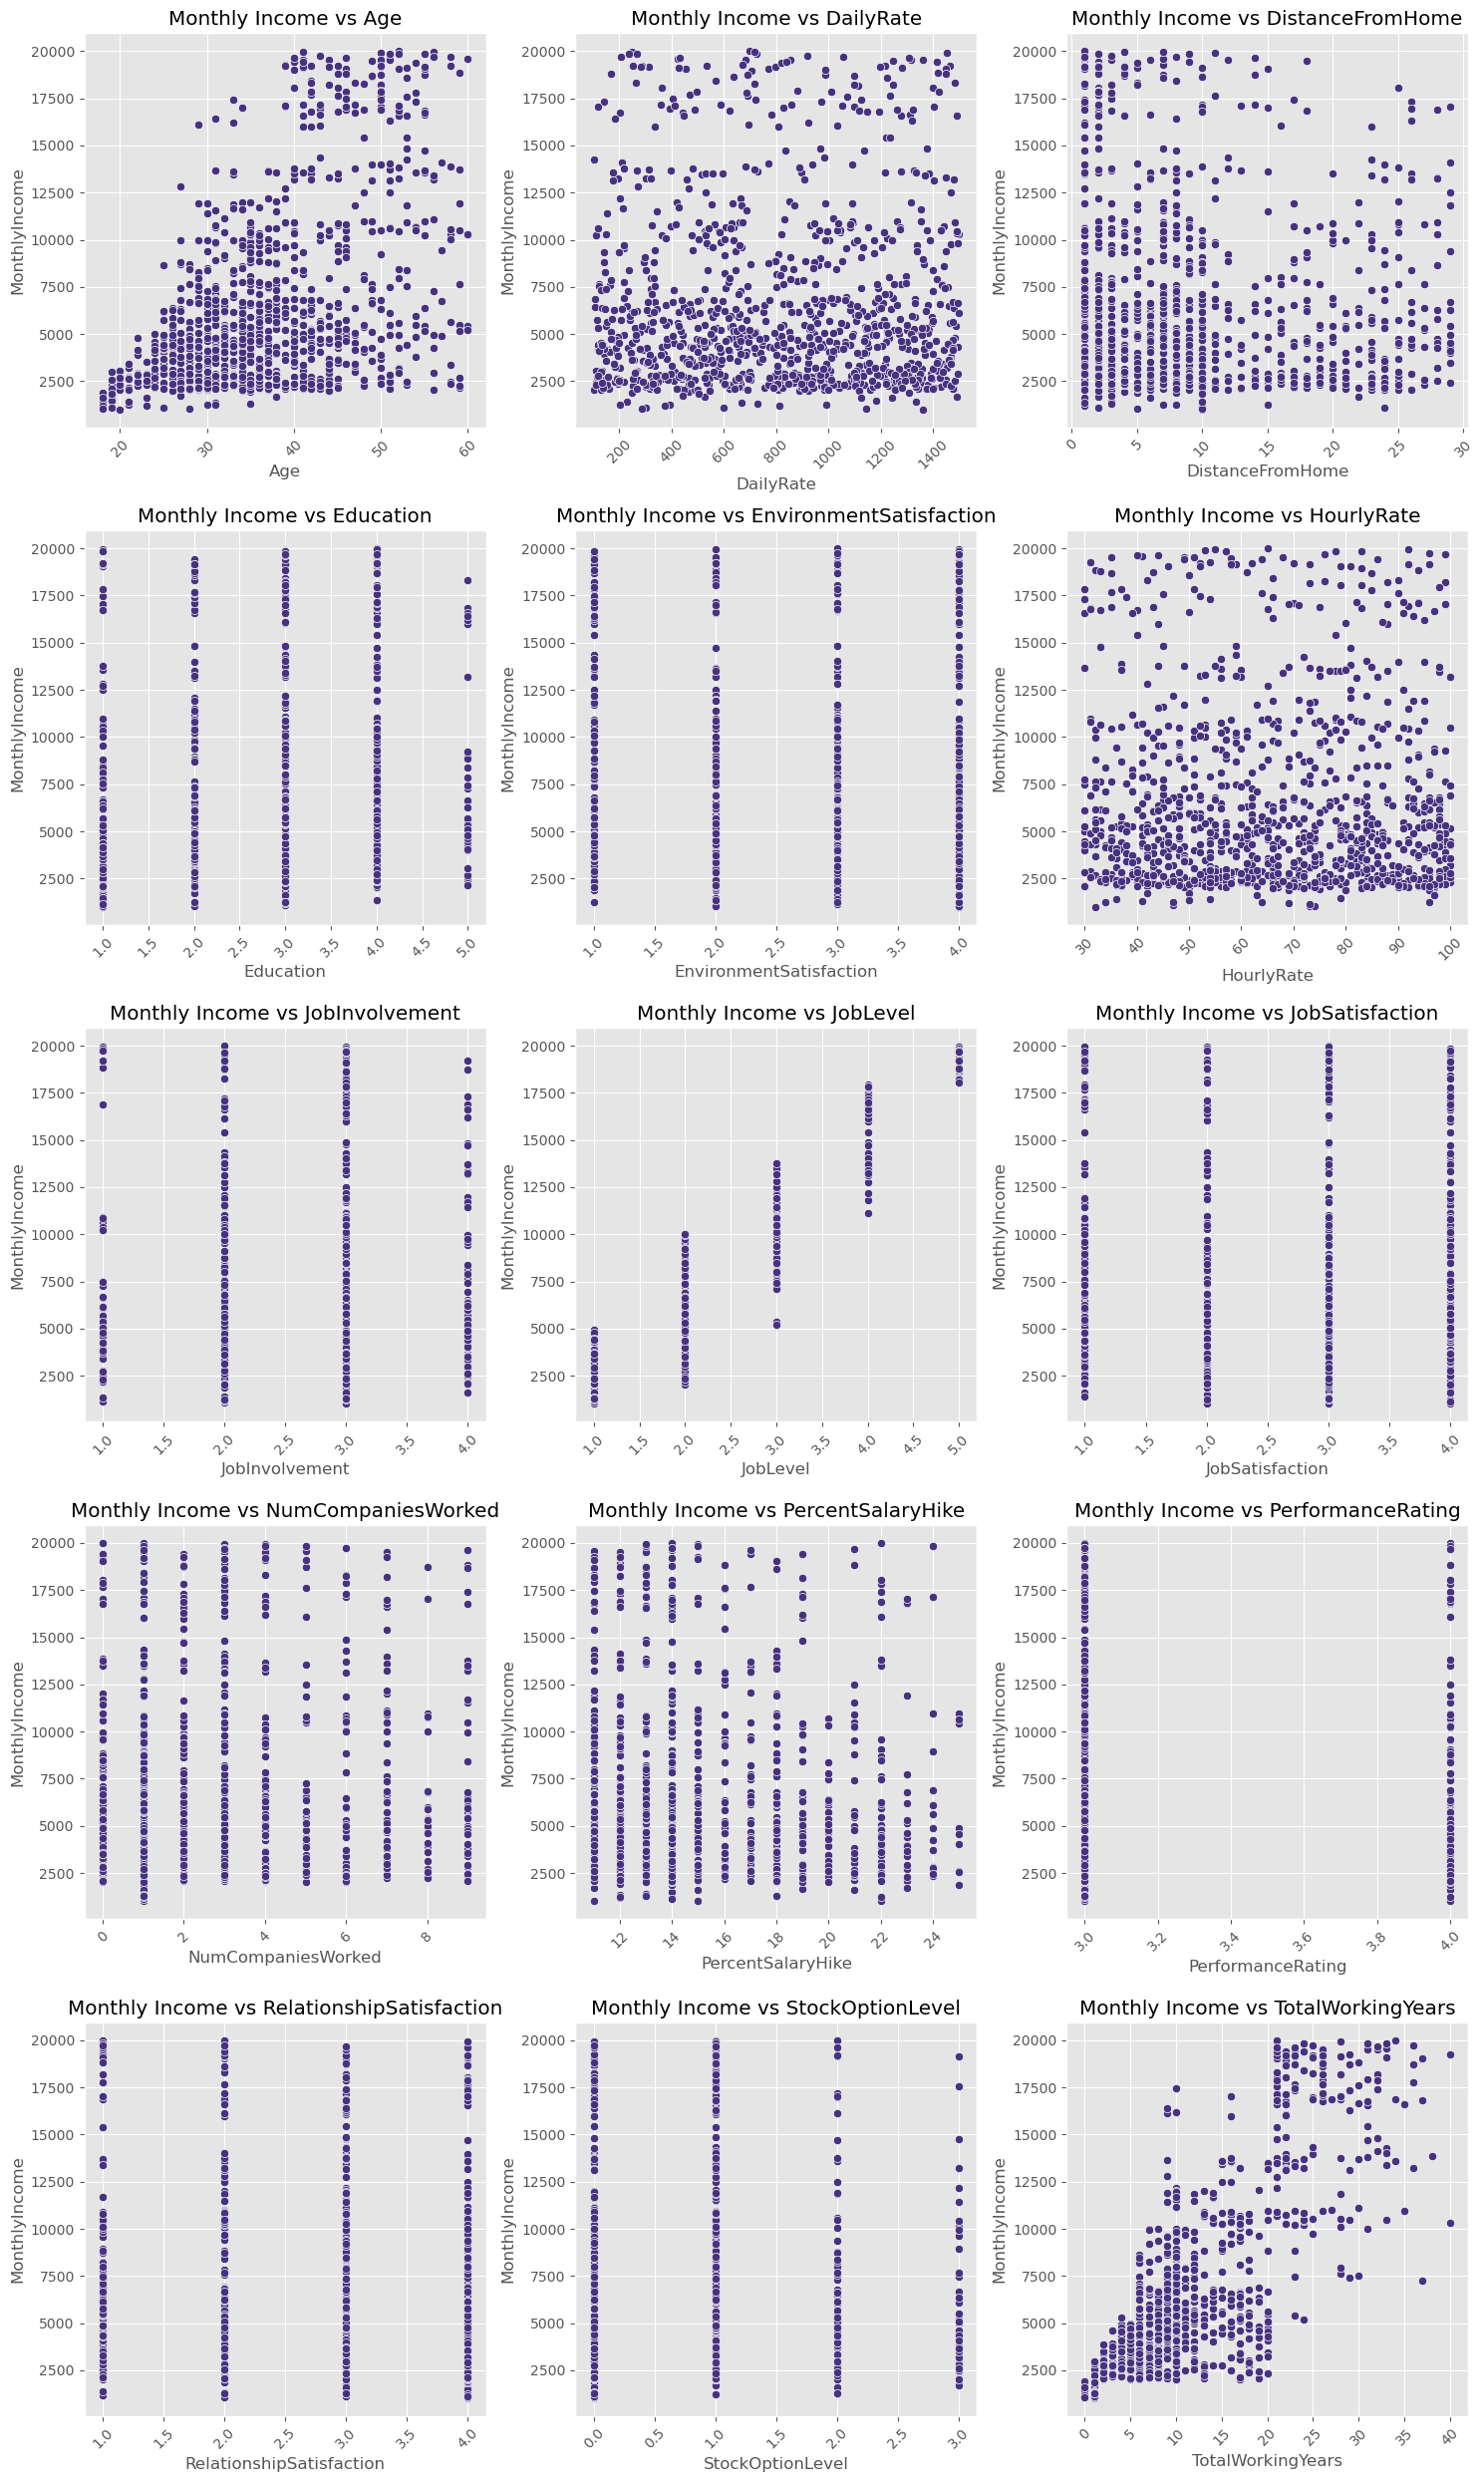

In [37]:
# Select numerical columns, excluding 'MonthlyIncome', and limit to 15 features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('MonthlyIncome')[:15]

# Create a figure with subplots (5 rows x 3 columns to accommodate 15 features)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))

# Flatten the axes array to easily index it in a loop
axes = axes.flatten()

# Loop through each numerical column and create a scatter plot
for i, col in enumerate(numerical_cols):
    sns.scatterplot(ax=axes[i], x=col, y='MonthlyIncome', data=data, palette='Set2')
    axes[i].set_title(f'Monthly Income vs {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


#### Multivariate Analysis

- Interaction Between Features

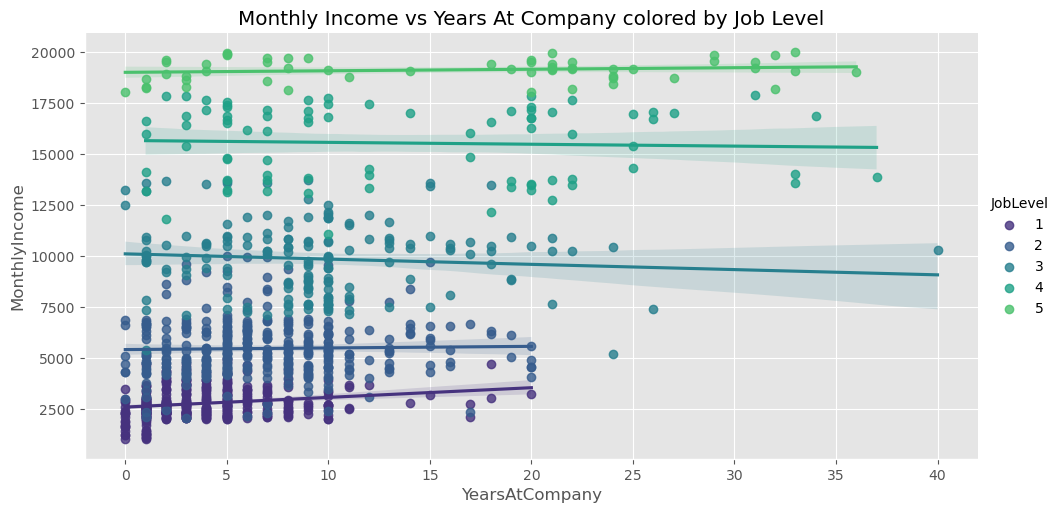

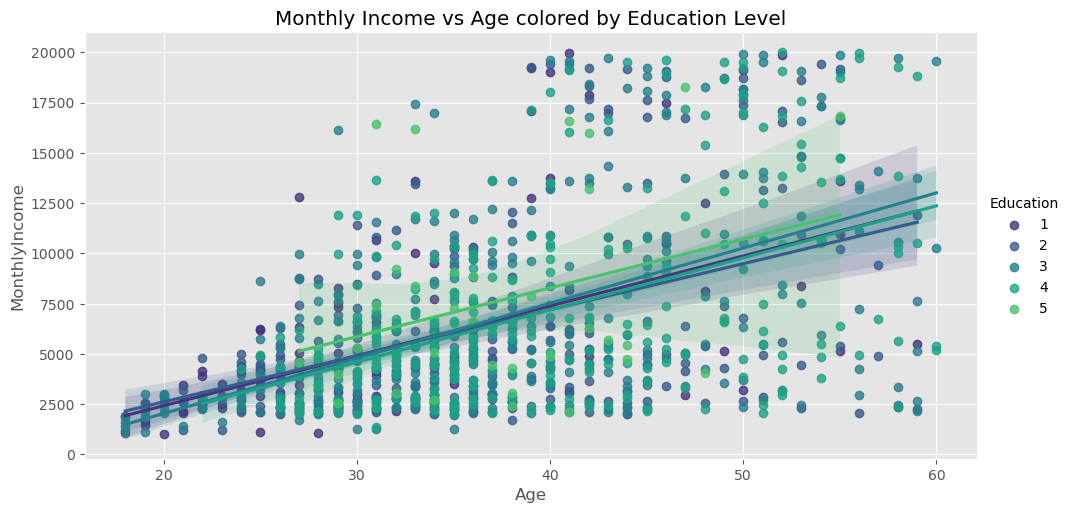

In [32]:
# Interaction between some key features
sns.lmplot(x='YearsAtCompany', y='MonthlyIncome', hue='JobLevel', data=data, aspect=2)
plt.title('Monthly Income vs Years At Company colored by Job Level')
plt.show()

sns.lmplot(x='Age', y='MonthlyIncome', hue='Education', data=data, aspect=2)
plt.title('Monthly Income vs Age colored by Education Level')
plt.show()


##### Key Observations:

- Income Stratification by Job Level:

There is a clear stratification in Monthly Income based on Job Level. Higher Job Levels (3, 4, 5) are associated with significantly higher incomes.
Job Level 1 has the lowest range of incomes, generally under 5,000, while Job Level 5 has incomes consistently above $15,000.
Income Stability Across Tenure:

Within each Job Level, there is not a substantial increase in Monthly Income as Years At Company increases. This suggests that salary increases are more strongly tied to Job Level than to tenure.

- Tenure and Income Trends by Job Level:

For Job Levels 4 and 5, incomes appear to decrease slightly as the Years At Company increases, but this decrease is not drastic.

For Job Level 1, there is a very slight positive trend in Monthly Income with increasing tenure, though it is not very pronounced.

- Variability Within Job Levels:

Higher Job Levels (e.g., Job Level 5) show a broader range of incomes, indicating possible variability in roles or responsibilities even within the same Job Level.

Job Level 1 has a tight cluster of incomes, indicating less variability in compensation.

- Concentration of Employees:

A significant number of employees are clustered around the lower years at the company (0-10 years) across all Job Levels, which may indicate a younger or newer workforce.

This EDA provides a comprehensive overview of the dataset, highlighting key features, relationships, and potential areas of interest for modeling.

##### Multivariate Analysis